# BET surface area calculations

Let's do a calculation of the BET surface area for these samples. First, make sure the data is imported by running the previous notebook.

In [1]:
%run import.ipynb

Selected 0 samples
Selected 23 adsorbates
Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric heat calculation


We use the `area_BET` function, and we first want to look at how the framework attempts to calculate the good BET region on its own. For this we pass the `verbose` parameter and then use matplotlib to display the graph.

MCM-41
BET surface area: a = 360 m²/g
Minimum pressure point chosen is 0.034 and maximum is 0.256
The slope of the BET fit: s = 268.434
The intercept of the BET fit: i = 2.264
The BET constant is: C = 119
Amount for a monolayer: n = 0.00369 mol/g


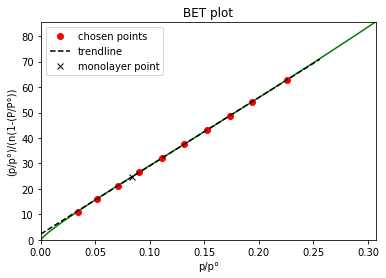

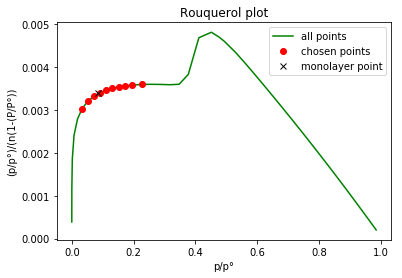

In [2]:
isotherm = next(i for i in isotherms_n2_77k if i.sample_name=='MCM-41')
print(isotherm.sample_name)
pygaps.area_BET(isotherm, verbose=True)
plt.show()

It looks that the correlation is reasonably good. A warning is emmited if this is not the case. We can also restrict the pressure range manually to see what difference it would make.

BET surface area: a = 362 m²/g
Minimum pressure point chosen is 0.051 and maximum is 0.194
The slope of the BET fit: s = 267.285
The intercept of the BET fit: i = 2.423
The BET constant is: C = 111
Amount for a monolayer: n = 0.00371 mol/g


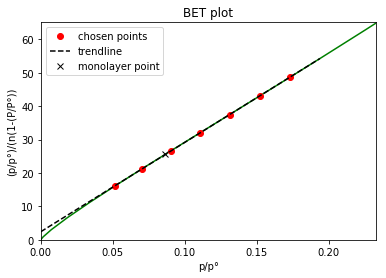

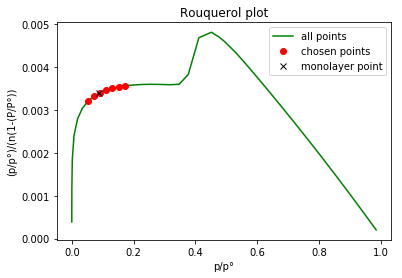

In [3]:
pygaps.area_BET(isotherm, limits=(0.05, 0.2), verbose=True)
plt.show()

Now let's do the analysis on all of the nitrogen samples. Instead of looking at them graphically, we'll assume the framework makes a reasonably accurate choice. The function returns a dictionary with all the calculated parameters, so we'll just select the BET area from there.

In [4]:
results = []
for isotherm in isotherms_n2_77k:
    results.append((isotherm.sample_name, pygaps.area_BET(isotherm)))
    
[(x, y['area']) for (x,y) in results]

[('MCM-41', 360.3974748777615),
 ('NaY', 700.9553926474382),
 ('SiO2', 214.47592039312602),
 ('Takeda 5A', 1110.6355133757006),
 ('UiO-66(Zr)', 1277.0119330505152)]

We also have the calorimetry isotherms, which were measured with $CO_2$ at room temperature. While there's no guarantee that the BET method is still applicable with this adsorbate and temperature, the framework can still attempt to perform the calculations.

It just happens that the carbon sample is the same in both isotherms. Let's see how the $CO_2$ BET surface area looks.

Takeda 5A
BET surface area: a = 782 m²/g
Minimum pressure point chosen is 0.027 and maximum is 0.253
The slope of the BET fit: s = 125.958
The intercept of the BET fit: i = 5.04
The BET constant is: C = 26
Amount for a monolayer: n = 0.00763 mol/g


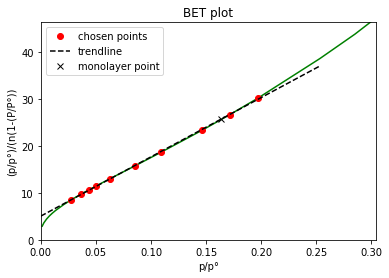

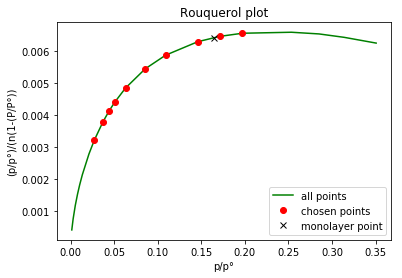

In [5]:
isotherm = next(i for i in isotherms_calorimetry if i.sample_name=='Takeda 5A')
print(isotherm.sample_name)
pygaps.area_BET(isotherm, verbose=True)
plt.show()

The surface area obtained with carbon dioxide is around 780 $m^2$. Compared to the nitrogen surface area of 1100 $m^2$, it is much smaller. While the checks implemented did not find anything wrong, this is likely due to interactions between carbon dioxide and the carbon surface leading to the breakdown of the BET theory.

While any kind of adsorbate and temperature can be analysed through the framework, result interpretation is left at the discretion of the user.

Now we'll compare the BET area with the Langmuir area in the [next notebook](area_langmuir.ipynb).